Beginning the data collecting by loading in MNIST original, a dataset with 70,000 small images of digits. The images are 28x28 pixels, and are grayscale. The images are already split into a training set (60,000 images) and a test set (10,000 images). The labels are the digits these images represent: integers from 0 to 9.


In [4]:
from scipy.io import loadmat

mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

Once the data has been loaded in, preprocessing can begin

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
#preprocessing the data.  We must first reshape the data to a 4D array(samples,width,height,number of colors), where each image is a different 2D matrix
#Normalizing the values of the data, could experiment with minmax scaler too.  To do this, we must flatten the data to a 2D array, then turn it back into a 4D array
#I do not need to look for null values because this data does not have any
mnist_data = mnist_data.reshape(-1, 28, 28, 1)
mnist_data_2d = mnist_data.reshape(-1, 28*28)
scaler = StandardScaler()
mnist_data_normalized = scaler.fit_transform(mnist_data_2d)
#After the 2D data has been normalized, return it to a 4D array
mnist_data_normalized = mnist_data_normalized.reshape(-1, 28, 28, 1)

The data must be split into a testing and a training set. The training set will be used to train the model, and the testing set will be used to test the model. The testing set will be 20% of the data, and the training set will be 80% of the data.

In [6]:
from sklearn.model_selection import train_test_split
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist_data_normalized, mnist_label, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#print(X_train[0])

(56000, 28, 28, 1) (56000,)
(14000, 28, 28, 1) (14000,)


We have 2D representations of the matrixes, they are 28 by 28 pixels. We can visualize the data by reshaping the data into a 28 by 28 matrix, and then plotting it using matplotlib. The data of these images are normalized.

asdfasdfasdf

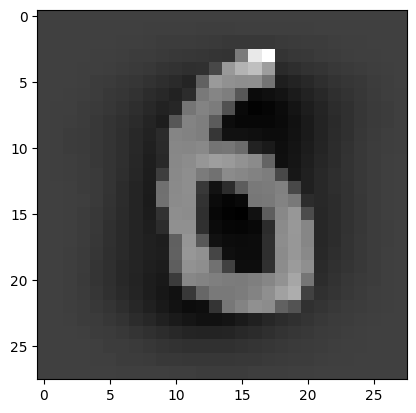

In [18]:
import matplotlib.pyplot as plt
random_nr = np.random.randint(0, 56000)

#Printing out the 2D array of the image
plt.imshow(X_train[random_nr].reshape(28,28), cmap="gray")

Now that we are certain the dataset is valid and ready to be used, we can now begin image augmentation. Image augmentation artificially increases the size of a dataset by modifying images by rotating and zooming them.  This is done to prevent overfitting, and to make the model more robust.  The images are rotated by 10 degrees, and zoomed by 10%.  The images are then reshaped back into a 28 by 28 matrix.

(56000, 28, 28, 1)
(56000, 28, 28, 1)
(9, 28, 28, 1)


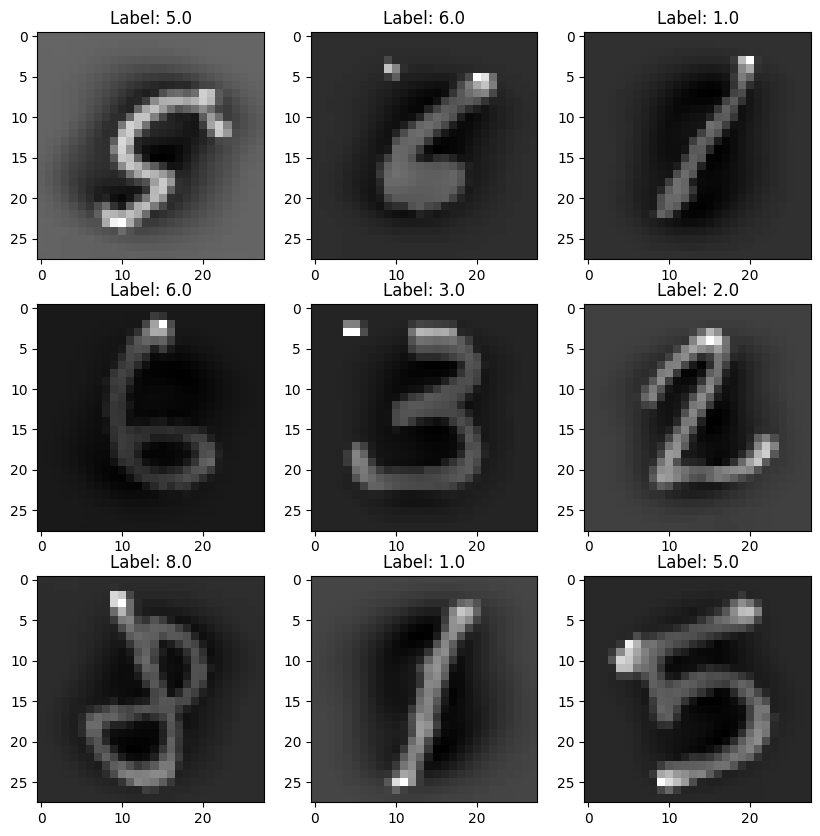

In [19]:
#Attempting to use Keras's image augmentation
import keras.preprocessing.image
from keras.preprocessing.image import ImageDataGenerator
print(X_train.shape)
datagen = ImageDataGenerator(
        rotation_range=25,  
        zoom_range = 0.10,  
        )
datagen.fit(X_train)
print(X_train.shape)
augmented_images, augmented_labels = next(datagen.flow(X_train, y_train, batch_size=9))
print(augmented_images.shape)
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(augmented_images[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {augmented_labels[i]}")
plt.show()

In [20]:
#Attempting to use d2l and pytorch's image augmentation
%matplotlib inline
# import torch
# import torchvision.transforms as transforms

# from d2l import torch as d2l

transform_train = transforms.Compose([
    
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor()])
train_dataset = d2l.data.X_train(train=True, transform=transform_train)
print(len(train_dataset))

NameError: name 'transforms' is not defined